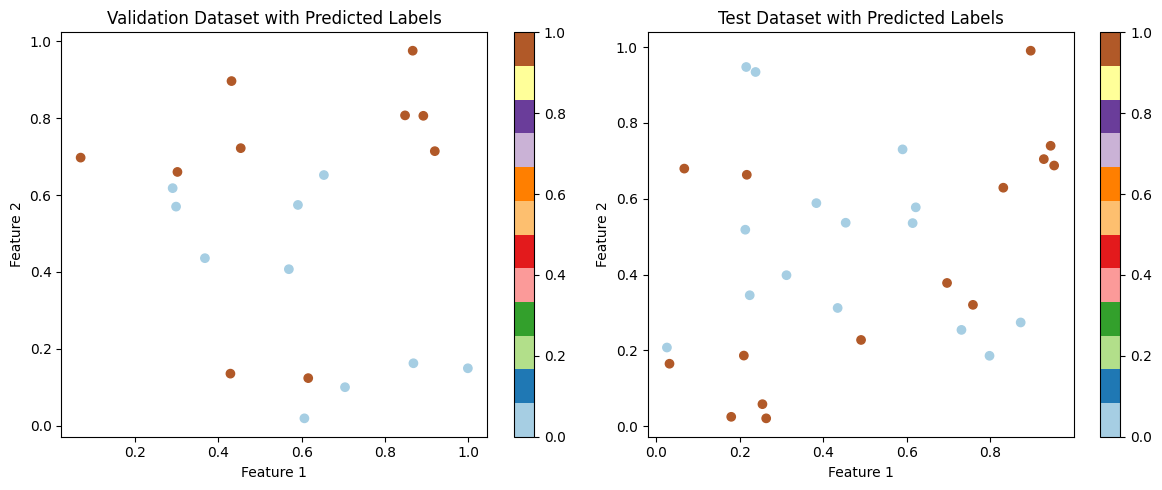

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class KNNClassifier:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for x_test in X_test:
            distances = np.linalg.norm(self.X_train - x_test, axis=1)
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train[nearest_indices]
            unique_labels, counts = np.unique(nearest_labels, return_counts=True)
            y_pred.append(unique_labels[np.argmax(counts)])
        return np.array(y_pred)

# Generate some random data for demonstration
np.random.seed(0)
X_train = np.random.rand(50, 2)  # 50 training samples, 2 features
y_train = np.random.choice([0, 1], size=50)  # Binary labels
X_val = np.random.rand(20, 2)  # 20 validation samples
y_val = np.random.choice([0, 1], size=20)
X_test = np.random.rand(30, 2)  # 30 test samples

# Define the value of k
k = 5

# Initialize and train the KNN classifier
knn = KNNClassifier(k)
knn.fit(X_train, y_train)

# Predict labels for validation and test datasets
y_val_pred = knn.predict(X_val)
y_test_pred = knn.predict(X_test)

# Plot the validation and test datasets with predicted labels
plt.figure(figsize=(12, 5))

# Plot validation dataset
plt.subplot(1, 2, 1)
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val_pred, cmap=plt.cm.Paired)
plt.title('Validation Dataset with Predicted Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

# Plot test dataset
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap=plt.cm.Paired)
plt.title('Test Dataset with Predicted Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

plt.tight_layout()
plt.show()


In [11]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority voye
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

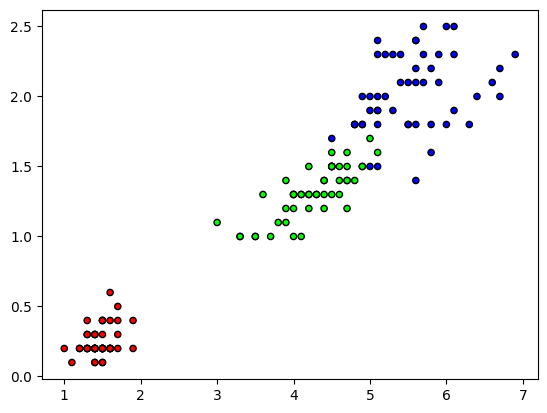

[1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0]
0.9666666666666667


In [12]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# from KNN import KNN

cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

plt.figure()
plt.scatter(X[:,2],X[:,3], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()


clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(predictions)

acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

In [13]:
from collections import Counter

import numpy as np


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[: self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]


if __name__ == "__main__":
    # Imports
    from matplotlib.colors import ListedColormap
    from sklearn import datasets
    from sklearn.model_selection import train_test_split

    cmap = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    iris = datasets.load_iris()
    X, y = iris.data, iris.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    k = 3
    clf = KNN(k=k)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print("KNN classification accuracy", accuracy(y_test, predictions))


KNN classification accuracy 1.0


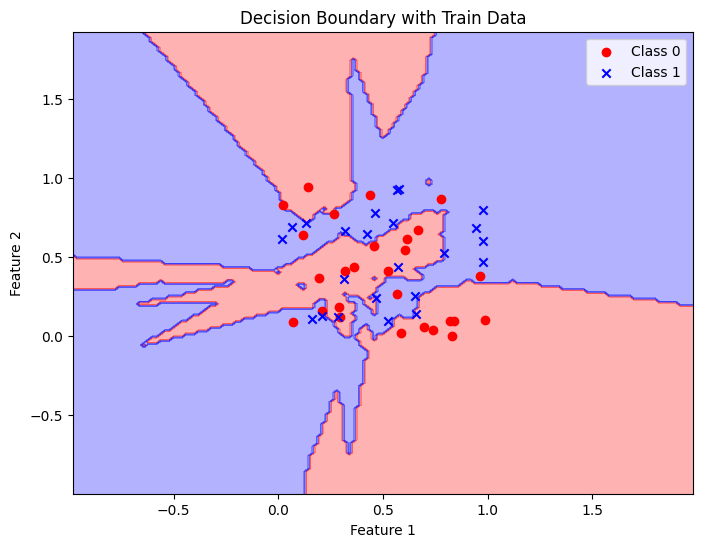

Validation accuracy: 0.45
Test accuracy: 0.43333333333333335


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class KNNClassifier:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for x_test in X_test:
            distances = np.linalg.norm(self.X_train - x_test, axis=1)
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train[nearest_indices]
            unique_labels, counts = np.unique(nearest_labels, return_counts=True)
            y_pred.append(unique_labels[np.argmax(counts)])
        return np.array(y_pred)

def plot_decision_boundary(X_train, y_train, knn, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y_train))])

    x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = knn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)

# Generate some random data for demonstration
np.random.seed(0)
X_train = np.random.rand(50, 2)  # 50 training samples, 2 features
y_train = np.random.choice([0, 1], size=50)  # Binary labels
X_val = np.random.rand(20, 2)  # 20 validation samples
y_val = np.random.choice([0, 1], size=20)
X_test = np.random.rand(30, 2)  # 30 test samples

# Define the value of k
k = 5

# Initialize and train the KNN classifier
knn = KNNClassifier(k)
knn.fit(X_train, y_train)

# Plot decision boundary with train data
plt.figure(figsize=(8, 6))
plot_decision_boundary(X_train, y_train, knn)

# Plot train data points
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', marker='o', label='Class 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', marker='x', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary with Train Data')
plt.legend()
plt.show()

# After training the model, you can use X_val and y_val for validation
y_val_pred = knn.predict(X_val)
accuracy = np.mean(y_val_pred == y_val)
print("Validation accuracy:", accuracy)

# After training the model, you can use X_test and y_test for testing
y_test_pred = knn.predict(X_test)
test_accuracy = np.mean(y_test_pred == y_test)
print("Test accuracy:", test_accuracy)



In [17]:
import math

def classifyAPoint(points,p,k=3):
	'''
	This function finds the classification of p using
	k nearest neighbor algorithm. It assumes only two
	groups and returns 0 if p belongs to group 0, else
	1 (belongs to group 1).

	Parameters - 
		points: Dictionary of training points having two keys - 0 and 1
				Each key have a list of training data points belong to that 

		p : A tuple, test data point of the form (x,y)

		k : number of nearest neighbour to consider, default is 3 
	'''

	distance=[]
	for group in points:
		for feature in points[group]:

			#calculate the euclidean distance of p from training points 
			euclidean_distance = math.sqrt((feature[0]-p[0])**2 +(feature[1]-p[1])**2)

			# Add a tuple of form (distance,group) in the distance list
			distance.append((euclidean_distance,group))

	# sort the distance list in ascending order
	# and select first k distances
	distance = sorted(distance)[:k]

	freq1 = 0 #frequency of group 0
	freq2 = 0 #frequency og group 1

	for d in distance:
		if d[1] == 0:
			freq1 += 1
		elif d[1] == 1:
			freq2 += 1

	return 0 if freq1>freq2 else 1

# driver function
def main():

	# Dictionary of training points having two keys - 0 and 1
	# key 0 have points belong to class 0
	# key 1 have points belong to class 1

	points = {0:[(1,12),(2,5),(3,6),(3,10),(3.5,8),(2,11),(2,9),(1,7)],
			1:[(5,3),(3,2),(1.5,9),(7,2),(6,1),(3.8,1),(5.6,4),(4,2),(2,5)]}

	# testing point p(x,y)
	p = (2.5,7)

	# Number of neighbours 
	k = 3

	print("The value classified to unknown point is: {}".\
		format(classifyAPoint(points,p,k)))

if __name__ == '__main__':
	main()


The value classified to unknown point is: 0


X 40500
y 500


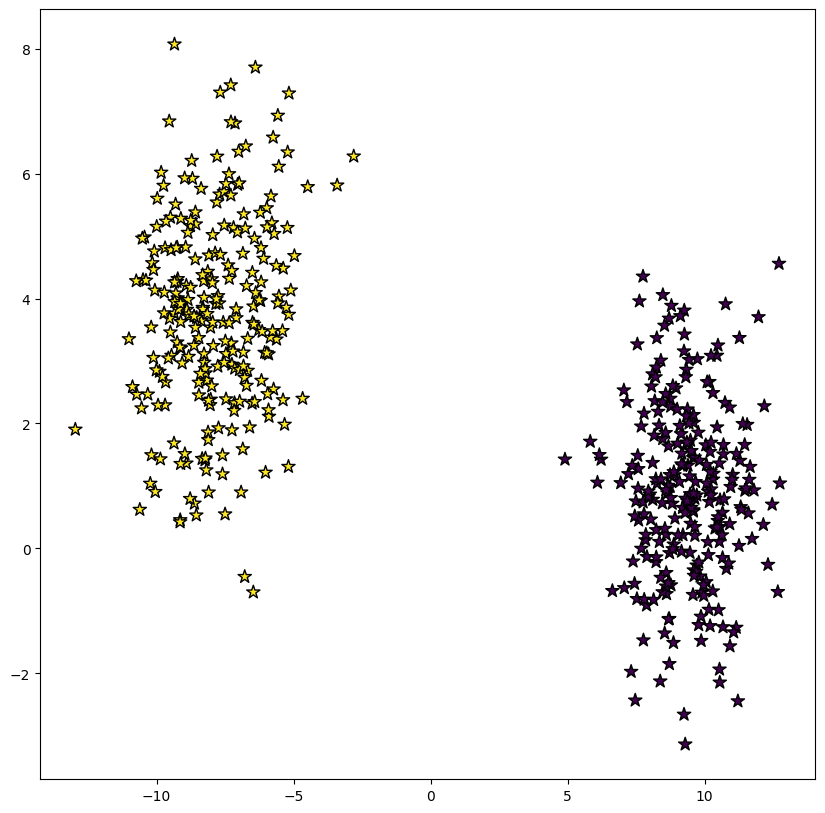

Accuracy with k=5 100.0
Accuracy with k=1 100.0


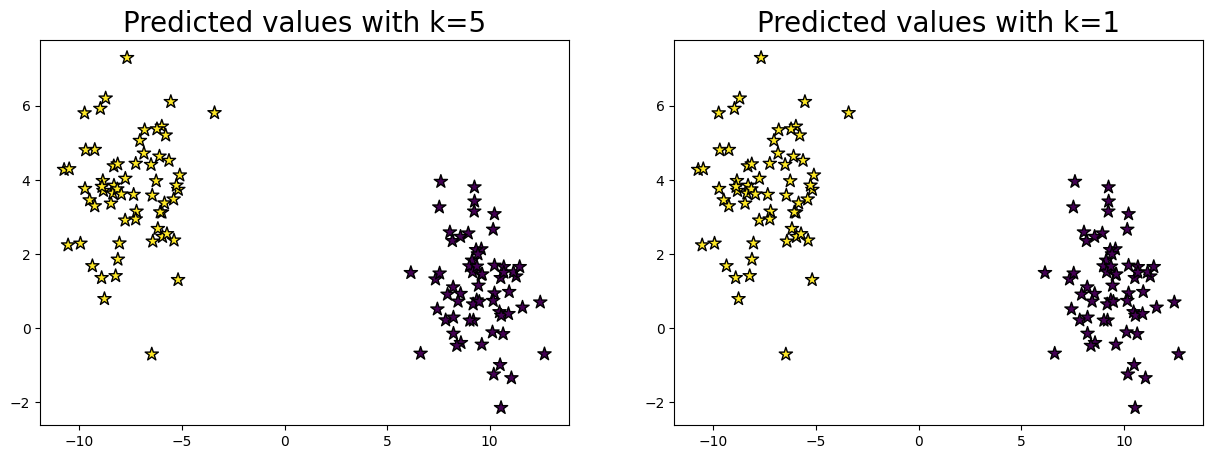

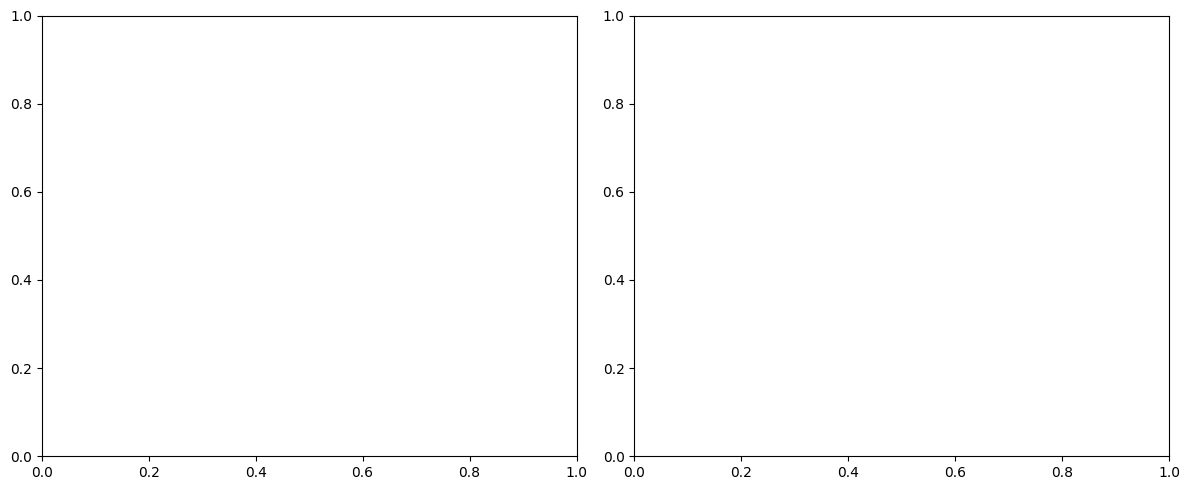

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples = 500, n_features = 81, centers = 2, cluster_std = 1.5, random_state = 4)

print("X",X.size)
print("y",y.size)

plt.style.use('default')
plt.figure(figsize = (10,10))
plt.scatter(X[:,0], X[:,1], c=y, marker= '*',s=100,edgecolors='black')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)

knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_5, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k=5", fontsize=20)

plt.subplot(1,2,2)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_1, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k=1", fontsize=20)
plt.show()

# Define a function to plot the decision boundary
def plot_decision_boundary(X, y, classifier, n_neighbors, ax):
    h = 0.02  # Step size in the mesh grid

    # Create a mesh grid of points covering the feature space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = np.array(Z).reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']), edgecolors='k', s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(f'KNN Decision Boundary (k={n_neighbors})')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# # Example usage:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot decision boundary for k=1
# plot_decision_boundary(X_train, y_train, knn1, 1, axes[0])

# # Plot decision boundary for k=5
# plot_decision_boundary(X_train, y_train, knn5, 5, axes[1])

plt.tight_layout()
plt.show()
